我選擇的題目是太空鐵達尼號這個題目，他題目的描述是:歡迎來到2912年，鐵達尼號太空船是一個月前下水的星際客輪。船上載有近 13,000 名乘客，這艘船開始了它的首航，將太陽系的移民運送到繞附近恆星運行的三顆新的宜居系外行星。

而在繞行半人馬座a星前往其第一個目的地途中，粗心的鐵達尼號太空船與隱藏在塵埃雲中的時空異常相撞。難過的是，它遭遇了與 1000 年前同名的相似命運。雖然飛船完好無損，但幾乎一半的乘客都被傳送到了異次元！
為了幫助救援人員並找回失蹤的乘客，面臨的挑戰是使用從太空船損壞的電腦系統中恢復的記錄來預測哪些乘客被異常現象運送。

我會選擇這個題目是因為這個題目跟上課的內容非常相似，再來是因為可以幫助就救援人員找回失蹤的乘客，我要開始接受這個挑戰!!!

我這個程式是參考這個網址:https://www.kaggle.com/code/shreyashbohara/titanic-spaceship



根據網址內的程式，一開始先帶入模組，numpy是運算非常重要的模組，pandas是資料處理非常重要的模組，
seaborn跟os詳細我不是很確定，seaborn可以拿來繪圖，os提供了一系列與操作系統交互的功能。

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

接著帶入kaggle競賽給的原始資料

In [3]:
train_data = pd.read_csv("D:/中央大學/大三上/機器學習概論/HW2/train.csv")
test_data = pd.read_csv("D:/中央大學/大三上/機器學習概論/HW2/test.csv")

我們把它顯示出來，看一下他的原始資料結構是什麼
可以看到乘客的編號、來自哪個星球、不知道是什麼睡眠、艙等、目的地、年齡及是不是VIP
客房服務、美食廣場、購物中心、水療中心、VR甲板名稱及最重要的是否被轉換

In [4]:
#train_data = train_data.dropna()
#test_data = test_data.dropna()

print(train_data.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [5]:
from sklearn.ensemble import RandomForestClassifier

# Replace NaN values with zero
test_data[["RoomService", "FoodCourt", "ShoppingMall", "VRDeck"]] = test_data[["RoomService", "FoodCourt", "ShoppingMall", "VRDeck"]].fillna(value=0)
train_data[["RoomService", "FoodCourt", "ShoppingMall", "VRDeck"]] = train_data[["RoomService", "FoodCourt", "ShoppingMall", "VRDeck"]].fillna(value=0)

y = train_data["Transported"]

features = ["RoomService", "FoodCourt", "ShoppingMall", "VRDeck"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


上面一大串我第一次也看很久
還好有ChatGPT不然我一定死機
前面第一行

In [ ]:
from sklearn.ensemble import RandomForestClassifier

從sklearn中導入了隨機森林分類。隨機森林是一種基於決策樹的集成學習方法，適用於分類或回歸。

In [ ]:
test_data[["RoomService", "FoodCourt", "ShoppingMall", "VRDeck"]] = test_data[["RoomService", "FoodCourt", "ShoppingMall", "VRDeck"]].fillna(value=0)
train_data[["RoomService", "FoodCourt", "ShoppingMall", "VRDeck"]] = train_data[["RoomService", "FoodCourt", "ShoppingMall", "VRDeck"]].fillna(value=0)

這裡使用fillna(value=0)將test_data和train_data中的四個特徵的NaN（缺失）值替換為0。這是常見的處理缺失數據的方法。
但其實老師上課有說，其實去修改原始資料值都會影響回歸結果，所以其實直接刪除資料會對回歸影響最小。

In [ ]:
y = train_data["Transported"]
features = ["RoomService", "FoodCourt", "ShoppingMall", "VRDeck"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

這裡y被指定為目標變量（即要預測的列），X是基於所選特徵的訓練數據。
pd.get_dummies用於創建特徵的獨特編碼，這對於處理個別特徵是有用的。

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

這裡建立了一個隨機森林分類器，並設置了100棵樹和最大深度5，並用訓練數據集X和y來訓練它。

In [ ]:
predictions = model.predict(X_test)

使用訓練好的模型對測試數據集X_test進行預測。

In [ ]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

最後，創建了一個新的DataFrame，其中包含乘客ID和相應的預測結果，並將它保存為CSV文件。

下面就是最後輸出的檔案樣子，輸出乘客ID跟轉換是與否。

     PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01        False
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]

最後預測結果為
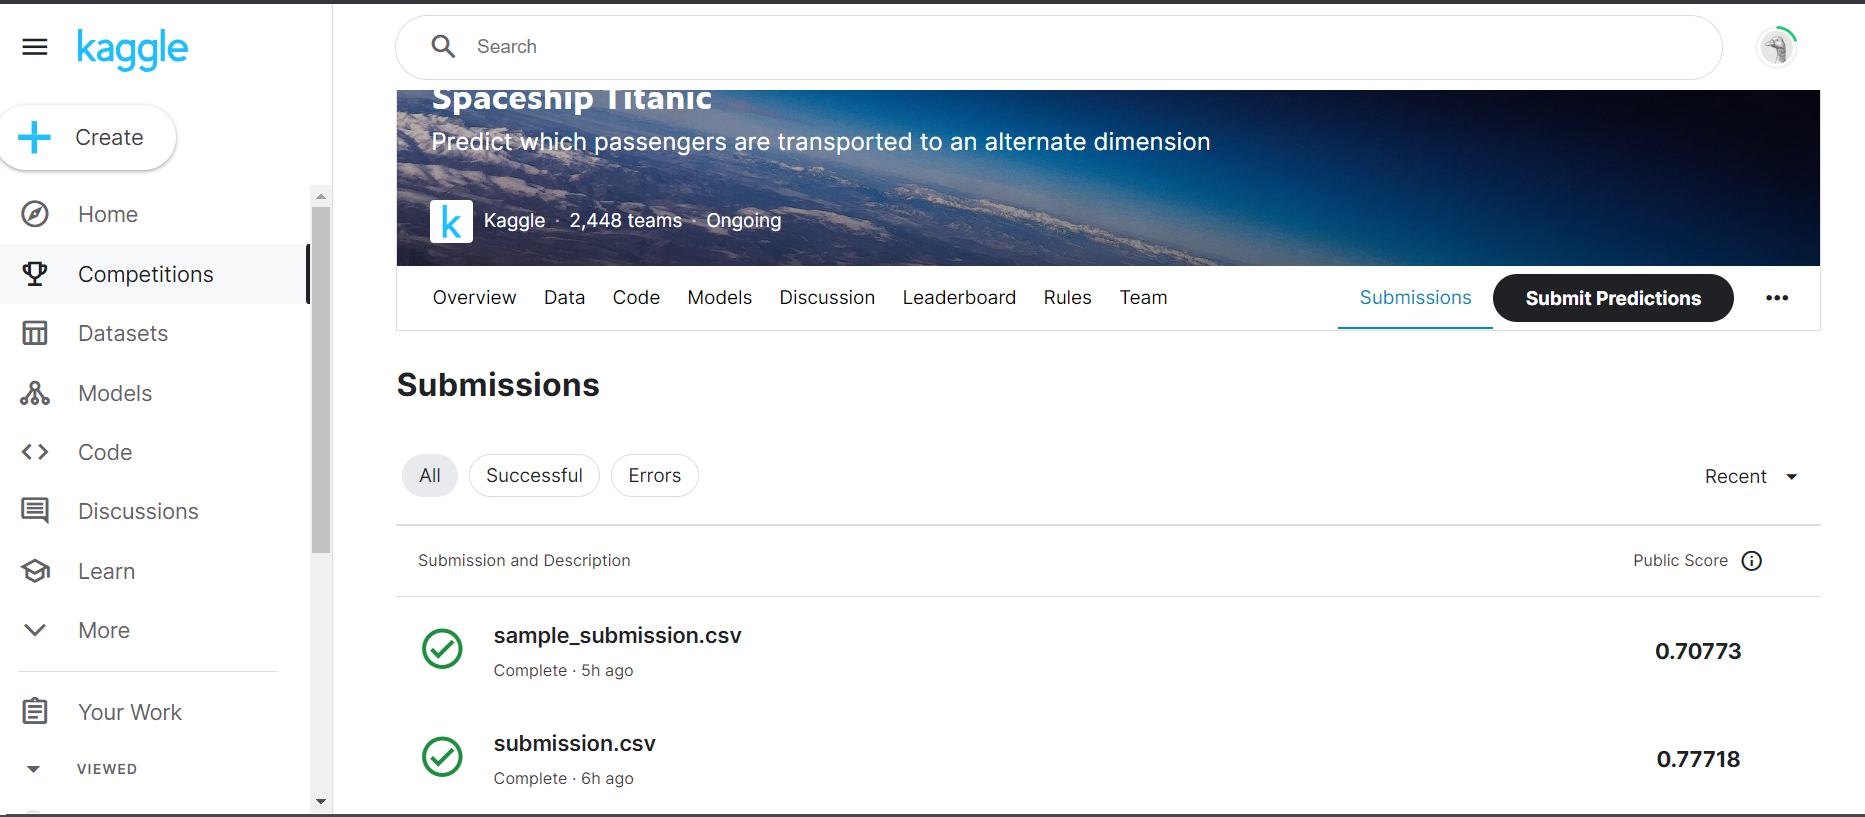
是下面那個:0.77718

但是我對於隨機森林並不是很懂，所以我又選了另一個人當參考。
參考下面連結:https://github.com/perry-chen/ML/blob/main/ML_kaggle_space_titanic.ipynb